In [19]:
import numpy as np
import math
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
train_path = '/content/drive/MyDrive/Assignment 2 Deep Learning/nature_12K/inaturalist_12K/train' 
test_path = '/content/drive/MyDrive/Assignment 2 Deep Learning/nature_12K/inaturalist_12K/val'

In [8]:
CATEGORIES = ["Amphibia", "Animalia", "Arachnida", "Aves", "Fungi", "Insecta", "Mammalia", "Mollusca", "Plantae", "Reptilia"]

In [9]:
train_data_gen = ImageDataGenerator(rescale=1./255) 
test_data_gen = ImageDataGenerator(rescale=1./255) 

In [56]:
epoch = 10
dropout = 0.2
number_of_filters = 16
filter_organisation = 1
batch_normalization = 'Yes'
learning_rate = 0.001
optimiser_fn = 'momentum'
batch_size = 16
img_width, img_height = 150,150
size_of_filters = 3
activation_function = 'relu'

train_gen = train_data_gen.flow_from_directory(
    train_path,
    target_size = (img_width, img_height)
)
val_gen = test_data_gen.flow_from_directory(
    test_path,
    target_size = (img_width, img_height)
)

model = Sequential()
model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters), input_shape=(img_width, img_height,3)))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
model.add(MaxPooling2D(pool_size=(2, 2)))

size_of_filters = filter_organisation*size_of_filters
model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
model.add(MaxPooling2D(pool_size=(2, 2)))

size_of_filters = filter_organisation*size_of_filters
model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
model.add(MaxPooling2D(pool_size=(2, 2)))

size_of_filters = filter_organisation*size_of_filters
model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
model.add(MaxPooling2D(pool_size=(2, 2)))

size_of_filters = filter_organisation*size_of_filters
model.add(Conv2D(number_of_filters, (size_of_filters, size_of_filters)))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
if (batch_normalization=='Yes'):
  model.add(BatchNormalization())
model.add(Activation(activation_function))
# we should not use dropout in convolution layers
model.add(Dropout(dropout))
model.add(Dense(10))

if optimiser_fn=='adam':
  opt = tf.keras.optimizers.Adam(learning_rate = learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
elif optimiser_fn=='nadam':
  opt = tf.keras.optimizers.Nadam(learning_rate = learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
elif optimiser_fn=='rmsprop':
  opt = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")
elif optimiser_fn=='sgd':
  opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum=0.0, nesterov=False, name="SGD")
elif optimiser_fn=='momentum':
  opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum=0.9, nesterov=False)
elif optimiser_fn=='nesterov':
  opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum=0.9,nesterov=True)

# if (data_augmentation=='Yes'):
#   https://www.tensorflow.org/tutorials/images/data_augmentation
# else:
#  Do nothing

# NOTE :  initialize our optimizer and model, then compile it
model.compile(optimizer=opt,
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

train_samples = 5000
val_samples = 500
history = model.fit_generator(train_gen,
                  steps_per_epoch = train_samples//batch_size,
                  epochs = epoch,
                  validation_data = val_gen,
                  validation_steps = val_samples//batch_size
                  )

Found 10041 images belonging to 10 classes.
Found 2015 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
312/312 [==============================] - 340s 1s/step - loss: 2.4304 - accuracy: 0.1120 - val_loss: 2.3163 - val_accuracy: 0.1210
Epoch 2/10
312/312 [==============================] - 326s 1s/step - loss: 2.2279 - accuracy: 0.1894 - val_loss: 2.1912 - val_accuracy: 0.2046
Epoch 3/10
312/312 [==============================] - 332s 1s/step - loss: 2.1693 - accuracy: 0.2065 - val_loss: 2.1651 - val_accuracy: 0.2308
Epoch 4/10
312/312 [==============================] - 322s 1s/step - loss: 2.1310 - accuracy: 0.2322 - val_loss: 2.1529 - val_accuracy: 0.2177
Epoch 5/10
312/312 [==============================] - 332s 1s/step - loss: 2.1000 - accuracy: 0.2452 - val_loss: 2.1715 - val_accuracy: 0.2288
Epoch 6/10
312/312 [==============================] - 321s 1s/step - loss: 2.0768 - accuracy: 0.2569 - val_loss: 2.0803 - val_accuracy: 0.2661
Epoch 7/10
312/312 [==============================] - 330s 1s/step - loss: 2.0525 - accuracy: 0.2672 - val_loss: 1.9956 - val_accuracy: 0.2964

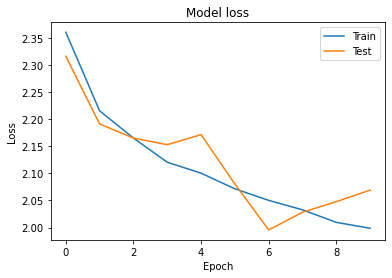

In [57]:
#Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test']) 
plt.show()

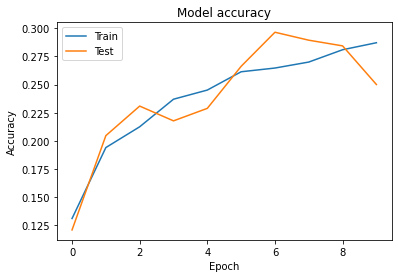

In [58]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()